# David Williams

# Project 4 Kmeans - Data 201

The data come from the Kaggle websit and shows 13 factors that contrubute to heart disease.

Context
This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.


# Content

Attribute Information:
> 1. age
> 2. sex
> 3. chest pain type (4 values)
> 4. resting blood pressure
> 5. serum cholestoral in mg/dl
> 6. fasting blood sugar > 120 mg/dl
> 7. resting electrocardiographic results (values 0,1,2)
> 8. maximum heart rate achieved
> 9. exercise induced angina
> 10. oldpeak = ST depression induced by exercise relative to rest
> 11. the slope of the peak exercise ST segment
> 12. number of major vessels (0-3) colored by flourosopy
> 13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

The 14th variable is the target and 1 if heart disease and 0 if no heart disease

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
heart_disease=pd.read_csv('C:/Users/dwilliams/Documents/montgomery/data 201/heart.csv')

In [5]:
heart_disease.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [6]:
heart_disease.shape

(1212, 14)

Clusters will be grouped by Age and Choestoral

In [7]:
#Clustering by Age and Choestoral

X = heart_disease.iloc[:, [0,4]].values

In [8]:
X

array([[ 63, 233],
       [ 37, 250],
       [ 41, 204],
       ...,
       [ 68, 193],
       [ 57, 131],
       [ 57, 236]], dtype=int64)

In [11]:
#Visualization
import seaborn as sns

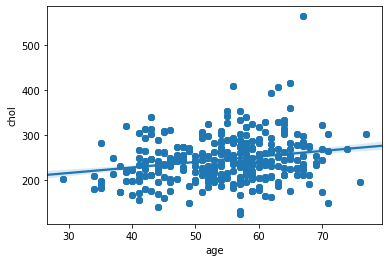

In [12]:
#scatter plot of Age vs. Cholesterol

sns.regplot(heart_disease.age,heart_disease.chol)

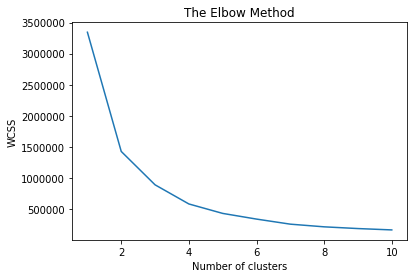

In [13]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter=300,n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Elbow show two clusters

In [14]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter=300,n_init=10)
y_kmeans = kmeans.fit_predict(X)

In [15]:
y_kmeans

array([0, 0, 0, ..., 0, 0, 0])

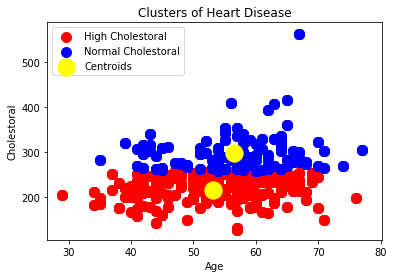

In [16]:
# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'High Cholestoral')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Normal Cholestoral')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Heart Disease')
plt.xlabel('Age')
plt.ylabel('Cholestoral')
plt.legend()
plt.show()

High Cholestorl cluster in blue
Normal Cholestoral cluster in red